## Clone the GitHub Repo

In [1]:
!git clone https://github.com/bhargav-borah/CIFAR10ImageClassification

Cloning into 'CIFAR10ImageClassification'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 74 (delta 6), reused 0 (delta 0), pack-reused 57
Unpacking objects: 100% (74/74), 1.05 MiB | 4.04 MiB/s, done.


## Import the dependencies

In [2]:
import torch
from torch import nn
from torchvision.transforms import transforms

from pathlib import Path
import os

## Set up device-agnostic code

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Create test and train dataloaders

In [4]:
from CIFAR10ImageClassification.modules.data_setup import get_cifar10_dataloaders

In [5]:
data_dir = 'data'

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

In [7]:
train_dataloader, test_dataloader, class_names = get_cifar10_dataloaders(data_dir=data_dir,
                                                                         transform=transform,
                                                                         batch_size=32,
                                                                         num_workers=os.cpu_count())

100%|██████████| 170498071/170498071 [00:04<00:00, 40757760.09it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


## Create a model

In [8]:
class CIFAR10ModelV4(nn.Module):
  def __init__(self, input_shape: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=8,
                  kernel_size=2,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=8,
                  out_channels=8,
                  kernel_size=2,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=1)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=8,
                  out_channels=8,
                  kernel_size=2,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=8,
                  out_channels=8,
                  kernel_size=2,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=1)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=9248,
                  out_features=output_shape)
    )

  def forward(self, X: torch.Tensor):
    return self.classifier(self.block_2(self.block_1(X)))

In [9]:
model_v4 = CIFAR10ModelV4(input_shape=3,
                          output_shape=len(class_names))
model_v4

CIFAR10ModelV4(
  (block_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=9248, out_features=10, bias=True)
  )
)

## Let's train the model

In [10]:
os.getcwd()

'/kaggle/working'

In [12]:
os.chdir('CIFAR10ImageClassification/modules')

In [13]:
from model_builder import fit

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v4.parameters(),
                             lr=1e-3)

history = fit(model=model_v4,
              epochs=10,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Training loss:  1.617339015007019 | Training accuracy: 0.42604365944862366 | Test loss: 1.3689532279968262 | Test accuracy: 0.5122803449630737
Training loss:  1.2907394170761108 | Training accuracy: 0.5464851260185242 | Test loss: 1.2370713949203491 | Test accuracy: 0.5617012977600098
Training loss:  1.1688120365142822 | Training accuracy: 0.5909308791160583 | Test loss: 1.1917088031768799 | Test accuracy: 0.5844648480415344
Training loss:  1.090228796005249 | Training accuracy: 0.619741678237915 | Test loss: 1.1256389617919922 | Test accuracy: 0.6118210554122925
Training loss:  1.041722297668457 | Training accuracy: 0.637915849685669 | Test loss: 1.1294593811035156 | Test accuracy: 0.6101238131523132
Training loss:  0.998700737953186 | Training accuracy: 0.6501919627189636 | Test loss: 1.1146631240844727 | Test accuracy: 0.6095247268676758
Training loss:  0.9702897667884827 | Training accuracy: 0.6609485149383545 | Test loss: 1.1155964136123657 | Test accuracy: 0.6151158213615417
Trai

In [16]:
from graphing import plot_loss_curves, plot_accuracy_curves

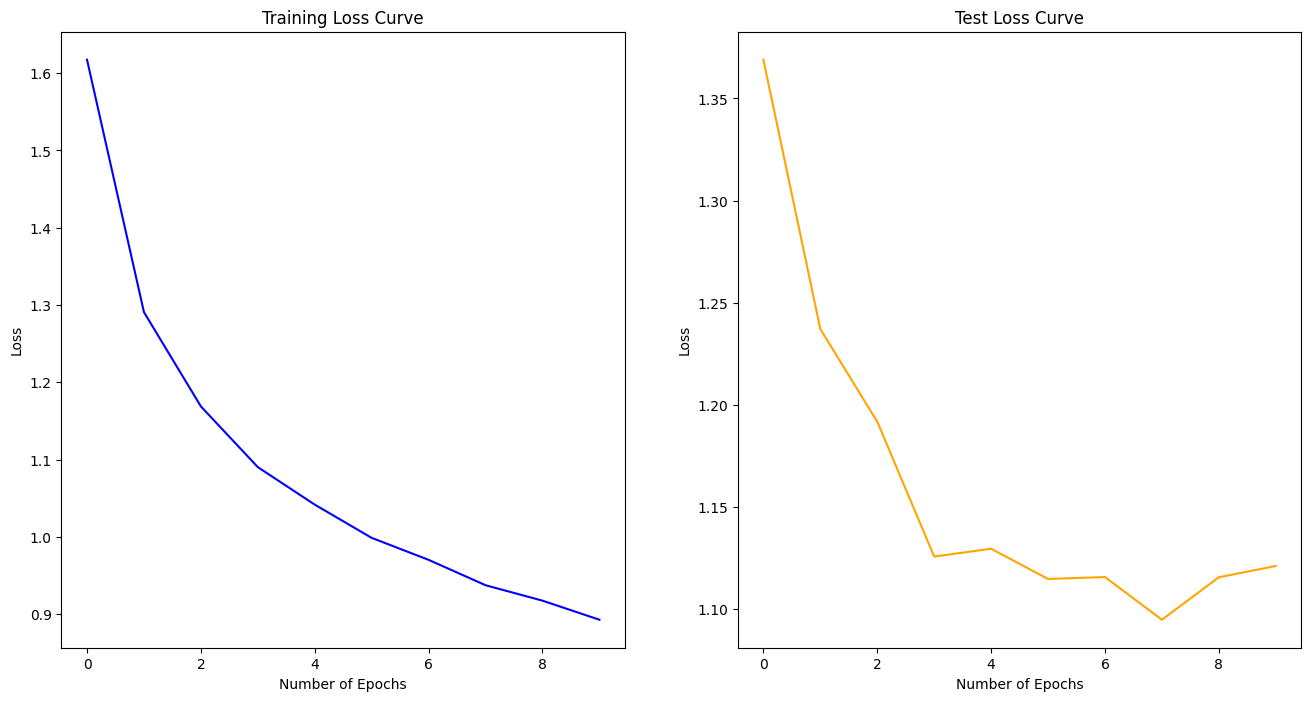

In [17]:
plot_loss_curves(train_losses=history['train_losses'],
                 test_losses=history['test_losses'])

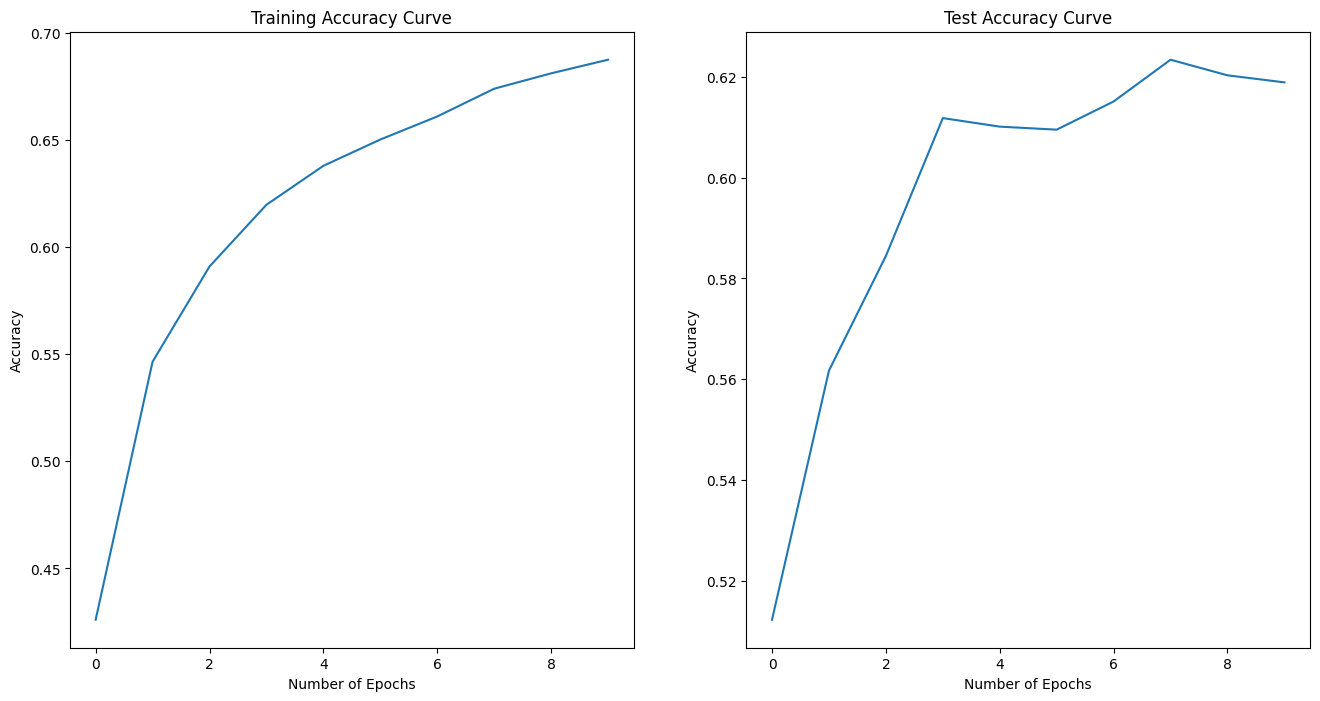

In [18]:
plot_accuracy_curves(train_accuracies=history['train_accuracies'], 
                     test_accuracies=history['test_accuracies'])

In [19]:
model_v4_1 = CIFAR10ModelV4(input_shape=3,
                            output_shape=len(class_names))

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v4_1.parameters(),
                             lr=1e-3)

history = fit(model=model_v4_1,
              epochs=100,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              device=device,
              patience=15)

  0%|          | 0/100 [00:00<?, ?it/s]

Training loss:  1.6092125177383423 | Training accuracy: 0.42090532183647156 | Test loss: 1.431121587753296 | Test accuracy: 0.4802316129207611
Training loss:  1.3529400825500488 | Training accuracy: 0.5180542469024658 | Test loss: 1.294173002243042 | Test accuracy: 0.5368410348892212
Training loss:  1.237657070159912 | Training accuracy: 0.5638595819473267 | Test loss: 1.257175087928772 | Test accuracy: 0.5509185194969177
Training loss:  1.156672477722168 | Training accuracy: 0.5936500430107117 | Test loss: 1.1672157049179077 | Test accuracy: 0.5832667350769043
Training loss:  1.097595453262329 | Training accuracy: 0.6154230833053589 | Test loss: 1.1704800128936768 | Test accuracy: 0.5809704661369324
Training loss:  1.0591816902160645 | Training accuracy: 0.6286988258361816 | Test loss: 1.1213605403900146 | Test accuracy: 0.59944087266922
Training loss:  1.024938941001892 | Training accuracy: 0.6386156678199768 | Test loss: 1.1229805946350098 | Test accuracy: 0.6064296960830688
Trainin

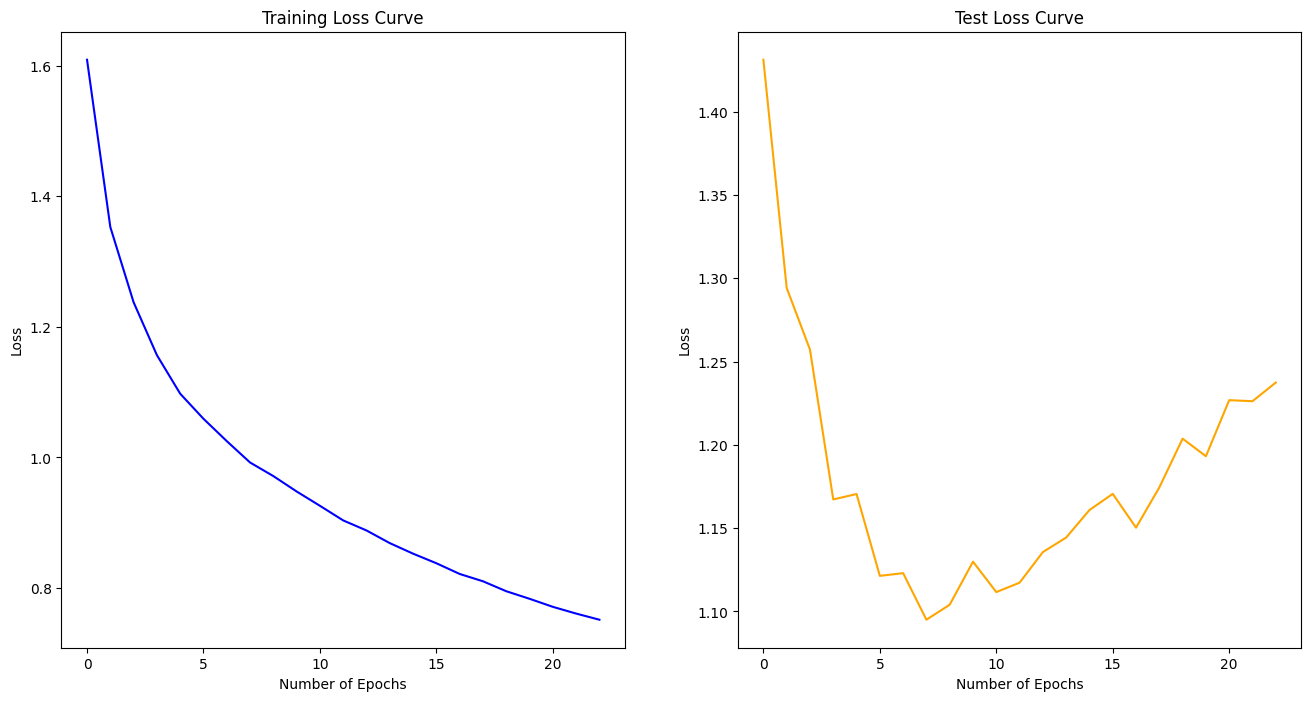

In [22]:
plot_loss_curves(train_losses=history['train_losses'],
                 test_losses=history['test_losses'])

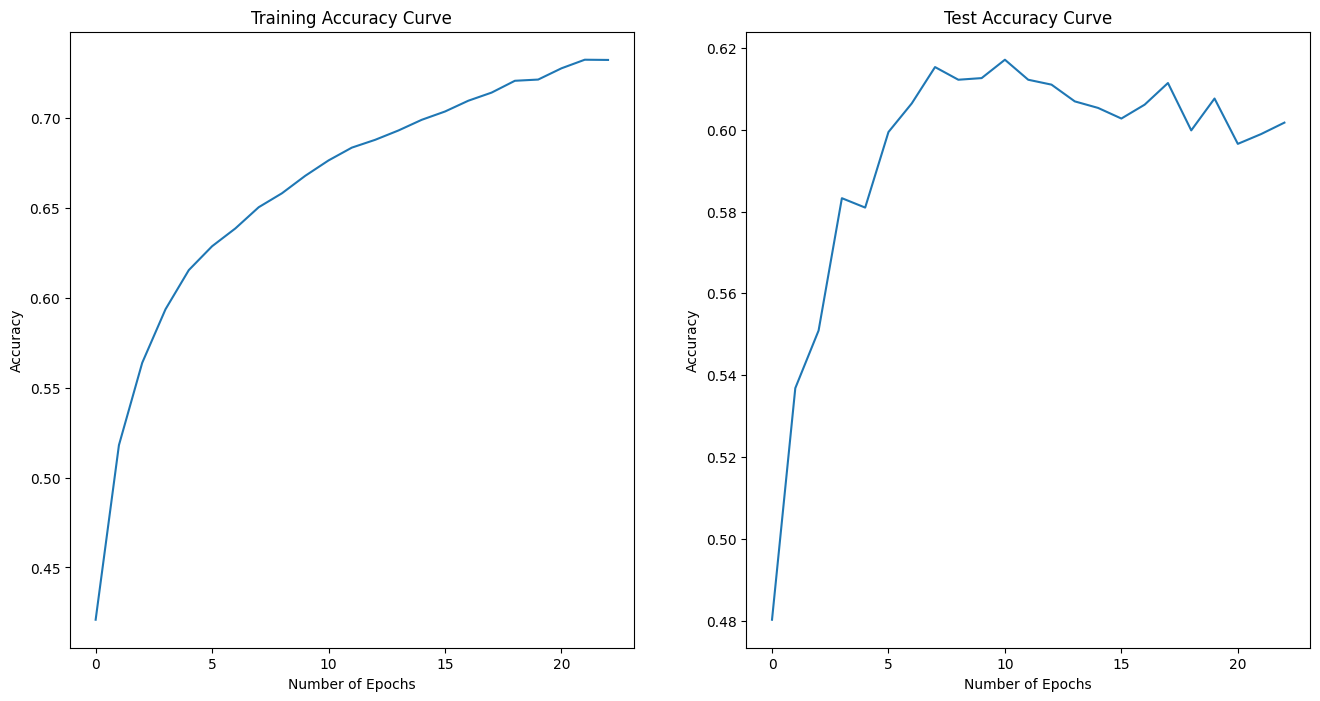

In [23]:
plot_accuracy_curves(train_accuracies=history['train_accuracies'],
                     test_accuracies=history['test_accuracies'])

In [24]:
model_v4_1.load_state_dict(history['best_state_dict'])

<All keys matched successfully>

In [25]:
os.listdir()

['__pycache__',
 'accuracy.py',
 'eval.py',
 'model_builder.py',
 'graphing.py',
 'data_setup.py',
 'engine.py']

In [26]:
from eval import eval_model

In [27]:
eval_model(model=model_v4_1,
           dataloader=train_dataloader,
           loss_fn=nn.CrossEntropyLoss(),
           device=device)

(0.6653065085411072, 0.7720129489898682)

In [28]:
eval_model(model=model_v4_1,
           dataloader=test_dataloader,
           loss_fn=nn.CrossEntropyLoss(),
           device=device)

(1.2373950481414795, 0.6017372012138367)